In [2]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import numpy.random as nprnd
import time

# Local imports.
from urbansurge import swmm_model, analysis_tools, file_utils

## Fault in physical system

In [3]:
# Fault parameterization.
fault_type = 'roughness'
fault_component = 2
fault_value = 0.1

In [4]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config_physical.yml"

# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

if fault_type == 'diameter':
    # Assign fault variables.
    link_id = fault_component
    offset = fault_value
    
    # Get initial diameter.
    initial_geometry = swmm.get_link_geometry(link_id)
    initial_diameter = initial_geometry[0]
    
    # Update the link diameter.
    swmm.set_link_geometry(link_id, [initial_diameter - offset, 0, 0, 0])

    # Update the offsets.
    swmm.set_link_offsets(link_id, (offset, offset))
    
elif fault_type == 'roughness':
    # Assign fault variables.
    link_id = fault_component
    n = fault_value
    
    # Update the link roughness.
    swmm.set_link_roughness(link_id, n)
    
elif fault_type == 'seepage':
    # Assign fault variables.
    link_id = fault_component
    seepage_rate = fault_value
    
    # Update the link roughness.
    swmm.set_link_seepage(link_id, seepage_rate)
    
elif fault_type == 'infiltration':
    # Assign fault variables.
    storage_id = fault_component
    Ksat = fault_value
    
    # Update the saturated hydraulic conductivity.
    swmm.set_storage_property(storage_id, 'Ksat', Ksat)
    
elif fault_type == 'silting':
    # Assign fault variables.
    storage_id = fault_component
    silt_depth = fault_value
    
    # Get storage depth.
    Ds_init = swmm.get_storage_property(storage_id, 'MaxDepth')

    # Get conduit offsets.
    overflow_link_id = swmm.get_storage_outfall_link(storage_id)
    (in_offset_init, out_offset) = swmm.get_link_offsets(overflow_link_id)

    # Get the storage invert elevation.
    zi_init = swmm.get_storage_property(storage_id, 'Elev.')
    
    # Update the storage_depth.
    Ds = Ds_init - silt_depth
    swmm.set_storage_property(storage_id, 'MaxDepth', Ds)
    
    # Update conduit offset.
    in_offset = in_offset_init - silt_depth
    swmm.set_link_offsets(overflow_link_id, (in_offset, out_offset))
    
    # Update storage invert elevation.
    zi = zi_init + silt_depth
    swmm.set_storage_property(storage_id, 'Elev.', zi)

# Run the simulation.
swmm.run_simulation()

# OUTPUT TO DATA FRAME
# ---------------------------------------------------------------------
# Get the node depths.
node_depth_df = swmm.get_node_depth()

# Get node flooding.
node_flood_df = swmm.get_node_flooding()

# Get node inflow.
node_total_inflow_df = swmm.get_node_total_inflow()

# Get link flow.
link_flow_df = swmm.get_link_flow()

# Get link depth.
link_depth_df = swmm.get_link_depth()

# Get link velocity.
link_velocity_df = swmm.get_link_velocity()

# Get precipitation time series.
prcp_df = swmm.get_rainfall_timeseries()

# Join data frames.
fault_df = node_depth_df.merge(node_flood_df, on='datetime')
fault_df = fault_df.merge(node_total_inflow_df, on='datetime')
fault_df = fault_df.merge(link_flow_df, on='datetime')
fault_df = fault_df.merge(link_depth_df, on='datetime')
fault_df = fault_df.merge(link_velocity_df, on='datetime')
fault_df = fault_df.merge(prcp_df, on='datetime')

# Add fault type, component, and value.
fault_df['fault_type'] = fault_type
fault_df['fault_component'] = fault_component
fault_df['fault_value'] = fault_value
fault_df = fault_df.copy()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-10-17 00:00:00
Start Time: 2020-11-16 23:55:00
Updated Roughness value to 0.1 for 2 in 2
Set Link 2 roughness to 0.1
INP PATH: C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\Canandaigua_physical_system_tmp.inp
2020-10-17 00:00:01 , 0
2020-10-17 00:50:01 , 0
2020-10-17 01:40:01 , 0
2020-10-17 02:30:01 , 0
2020-10-17 03:20:01 , 0
2020-10-17 04:10:01 , 1
2020-10-17 05:00:01 , 1
2020-10-17 05:50:01 , 1
2020-10-17 06:40:01 , 1
2020-10-17 07:30:01 , 1
2020-10-17 08:20:01 , 1
2020-10-17 09:10:01 , 1
2020-10-17 10:00:01 , 1
2020-10-17 10:50:01 , 1
2020-10-17 11:40:01 , 2
2020-10-17 12:30:01 , 2
2020-10-17 13:20:01 , 2
2020-10-17 14:10:01 , 2
2020-10-17 15:00:01 , 2
2020-10-17 15:50:01 , 2
2020-10-17 16:40:01 , 2
2020-10-17 17:30:01 , 2
2020-10-17 18:20:01 , 2
2020-10-17 19:10:01 , 3
2020-10-17 20:00:01 , 3
2020-10-17 20:50:01 , 3
2020-10-17 21:40:01 , 3
2020-10-17 22:30:01 , 3
2020-10-17 23:20:01 , 3
2020-

2020-10-28 10:09:31 , 37
2020-10-28 10:59:31 , 37
2020-10-28 11:49:31 , 37
2020-10-28 12:39:31 , 37
2020-10-28 13:29:31 , 37
2020-10-28 14:19:31 , 37
2020-10-28 15:09:31 , 38
2020-10-28 15:59:31 , 38
2020-10-28 16:49:31 , 38
2020-10-28 17:39:31 , 38
2020-10-28 18:29:31 , 38
2020-10-28 19:19:31 , 38
2020-10-28 20:09:31 , 38
2020-10-28 20:59:31 , 38
2020-10-28 21:49:31 , 38
2020-10-28 22:39:31 , 39
2020-10-28 23:29:31 , 39
2020-10-29 00:19:31 , 39
2020-10-29 01:09:31 , 39
2020-10-29 01:59:31 , 39
2020-10-29 02:49:31 , 39
2020-10-29 03:39:31 , 39
2020-10-29 04:29:31 , 39
2020-10-29 05:19:31 , 39
2020-10-29 06:09:31 , 40
2020-10-29 06:59:31 , 40
2020-10-29 07:49:31 , 40
2020-10-29 08:39:31 , 40
2020-10-29 09:29:31 , 40
2020-10-29 10:19:31 , 40
2020-10-29 11:09:31 , 40
2020-10-29 11:59:31 , 40
2020-10-29 12:49:31 , 40
2020-10-29 13:39:31 , 41
2020-10-29 14:29:31 , 41
2020-10-29 15:19:31 , 41
2020-10-29 16:09:31 , 41
2020-10-29 16:59:31 , 41
2020-10-29 17:49:31 , 41
2020-10-29 18:39:31 , 41


2020-11-09 17:59:31 , 77
2020-11-09 18:49:31 , 77
2020-11-09 19:39:31 , 77
2020-11-09 20:29:31 , 77
2020-11-09 21:19:31 , 77
2020-11-09 22:09:31 , 77
2020-11-09 22:59:31 , 77
2020-11-09 23:49:31 , 77
2020-11-10 00:39:31 , 78
2020-11-10 01:29:31 , 78
2020-11-10 02:19:31 , 78
2020-11-10 03:09:31 , 78
2020-11-10 03:59:31 , 78
2020-11-10 04:49:31 , 78
2020-11-10 05:39:31 , 78
2020-11-10 06:29:31 , 78
2020-11-10 07:19:31 , 78
2020-11-10 08:09:31 , 79
2020-11-10 08:59:31 , 79
2020-11-10 09:49:31 , 79
2020-11-10 10:39:31 , 79
2020-11-10 11:29:31 , 79
2020-11-10 12:19:31 , 79
2020-11-10 13:09:31 , 79
2020-11-10 13:59:31 , 79
2020-11-10 14:49:31 , 79
2020-11-10 15:39:31 , 80
2020-11-10 16:29:31 , 80
2020-11-10 17:19:31 , 80
2020-11-10 18:09:31 , 80
2020-11-10 18:59:31 , 80
2020-11-10 19:49:31 , 80
2020-11-10 20:39:31 , 80
2020-11-10 21:29:31 , 80
2020-11-10 22:19:31 , 80
2020-11-10 23:09:31 , 81
2020-11-10 23:59:31 , 81
2020-11-11 00:49:31 , 81
2020-11-11 01:39:31 , 81
2020-11-11 02:29:31 , 81


## Run healthy model

In [190]:
# Path to configuration file.
model_config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config_healthy.yml"

# Create instance of SWMM model.
model_swmm = swmm_model.SWMM(model_config_path)

# Configure model.
model_swmm.configure_model()

# Run simulation.
model_swmm.run_simulation()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-10-17 00:00:00
Start Time: 2020-11-16 23:55:00
INP PATH: C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\Canandaigua_healthy_model.inp
2020-10-17 00:00:01 , 0
2020-10-17 00:50:01 , 0
2020-10-17 01:40:01 , 0
2020-10-17 02:30:01 , 0
2020-10-17 03:20:01 , 0
2020-10-17 04:10:01 , 1
2020-10-17 05:00:01 , 1
2020-10-17 05:50:01 , 1
2020-10-17 06:40:01 , 1
2020-10-17 07:30:01 , 1
2020-10-17 08:20:01 , 1
2020-10-17 09:10:01 , 1
2020-10-17 10:00:01 , 1
2020-10-17 10:50:01 , 1
2020-10-17 11:40:01 , 2
2020-10-17 12:30:01 , 2
2020-10-17 13:20:01 , 2
2020-10-17 14:10:01 , 2
2020-10-17 15:00:01 , 2
2020-10-17 15:50:01 , 2
2020-10-17 16:40:01 , 2
2020-10-17 17:30:01 , 2
2020-10-17 18:20:01 , 2
2020-10-17 19:10:01 , 3
2020-10-17 20:00:01 , 3
2020-10-17 20:50:01 , 3
2020-10-17 21:40:01 , 3
2020-10-17 22:30:01 , 3
2020-10-17 23:20:01 , 3
2020-10-18 00:10:01 , 3
2020-10-18 01:00:01 , 3
2020-10-18 01:50:01 , 3
2020-10-1

2020-10-30 04:39:32 , 43
2020-10-30 05:29:32 , 43
2020-10-30 06:19:32 , 43
2020-10-30 07:09:32 , 43
2020-10-30 07:59:32 , 43
2020-10-30 08:49:32 , 43
2020-10-30 09:39:32 , 43
2020-10-30 10:29:32 , 43
2020-10-30 11:19:32 , 43
2020-10-30 12:09:32 , 44
2020-10-30 12:59:32 , 44
2020-10-30 13:49:32 , 44
2020-10-30 14:39:32 , 44
2020-10-30 15:29:32 , 44
2020-10-30 16:19:32 , 44
2020-10-30 17:09:32 , 44
2020-10-30 17:59:32 , 44
2020-10-30 18:49:32 , 44
2020-10-30 19:39:32 , 45
2020-10-30 20:29:32 , 45
2020-10-30 21:19:32 , 45
2020-10-30 22:09:32 , 45
2020-10-30 22:59:32 , 45
2020-10-30 23:49:32 , 45
2020-10-31 00:39:32 , 45
2020-10-31 01:29:32 , 45
2020-10-31 02:19:32 , 45
2020-10-31 03:09:32 , 46
2020-10-31 03:59:32 , 46
2020-10-31 04:49:32 , 46
2020-10-31 05:39:32 , 46
2020-10-31 06:29:32 , 46
2020-10-31 07:19:32 , 46
2020-10-31 08:09:32 , 46
2020-10-31 08:59:32 , 46
2020-10-31 09:49:32 , 46
2020-10-31 10:39:32 , 47
2020-10-31 11:29:32 , 47
2020-10-31 12:19:32 , 47
2020-10-31 13:09:32 , 47


2020-11-11 00:49:32 , 81
2020-11-11 01:39:32 , 81
2020-11-11 02:29:32 , 81
2020-11-11 03:19:32 , 81
2020-11-11 04:09:32 , 81
2020-11-11 04:59:32 , 81
2020-11-11 05:49:32 , 81
2020-11-11 06:39:32 , 82
2020-11-11 07:29:32 , 82
2020-11-11 08:19:32 , 82
2020-11-11 09:09:32 , 82
2020-11-11 09:59:32 , 82
2020-11-11 10:49:32 , 82
2020-11-11 11:39:32 , 82
2020-11-11 12:29:32 , 82
2020-11-11 13:19:32 , 82
2020-11-11 14:09:32 , 83
2020-11-11 14:59:32 , 83
2020-11-11 15:49:32 , 83
2020-11-11 16:39:32 , 83
2020-11-11 17:29:32 , 83
2020-11-11 18:19:32 , 83
2020-11-11 19:09:32 , 83
2020-11-11 19:59:32 , 83
2020-11-11 20:49:32 , 83
2020-11-11 21:39:32 , 84
2020-11-11 22:29:32 , 84
2020-11-11 23:19:32 , 84
2020-11-12 00:09:32 , 84
2020-11-12 00:59:32 , 84
2020-11-12 01:49:32 , 84
2020-11-12 02:39:32 , 84
2020-11-12 03:29:32 , 84
2020-11-12 04:19:32 , 84
2020-11-12 05:09:32 , 85
2020-11-12 05:59:32 , 85
2020-11-12 06:49:32 , 85
2020-11-12 07:39:32 , 85
2020-11-12 08:29:32 , 85
2020-11-12 09:19:32 , 85


In [191]:
# OUTPUT TO DATA FRAME
# ---------------------------------------------------------------------
# Get the node depths.
model_node_depth_df = model_swmm.get_node_depth()

# Get node flooding.
model_node_flood_df = model_swmm.get_node_flooding()

# Get node inflow.
model_node_total_inflow_df = model_swmm.get_node_total_inflow()

# Get link flow.
model_link_flow_df = model_swmm.get_link_flow()

# Get link depth.
model_link_depth_df = model_swmm.get_link_depth()

# Get link velocity.
model_link_velocity_df = model_swmm.get_link_velocity()

# Get precipitation time series.
model_prcp_df = model_swmm.get_rainfall_timeseries()

# Join data frames.
model_df = model_node_depth_df.merge(model_node_flood_df, on='datetime')
model_df = model_df.merge(model_node_total_inflow_df, on='datetime')
model_df = model_df.merge(model_link_flow_df, on='datetime')
model_df = model_df.merge(model_link_depth_df, on='datetime')
model_df = model_df.merge(model_link_velocity_df, on='datetime')
model_df = model_df.merge(model_prcp_df, on='datetime')

model_df.shape

(8927, 59)

## Plotting

C:\Users\ay434\AppData\Local\Temp\ipykernel_11280\3293881158.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\ay434\AppData\Local\Temp\ipykernel_11280\3293881158.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


Text(0, 0.5, 'Node Flooding')

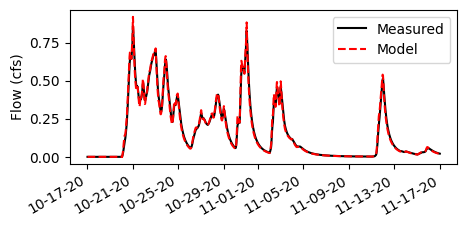

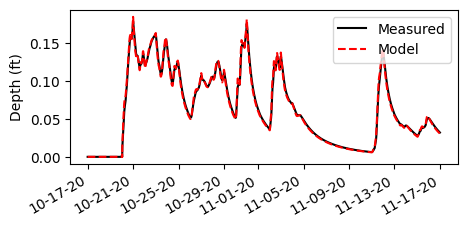

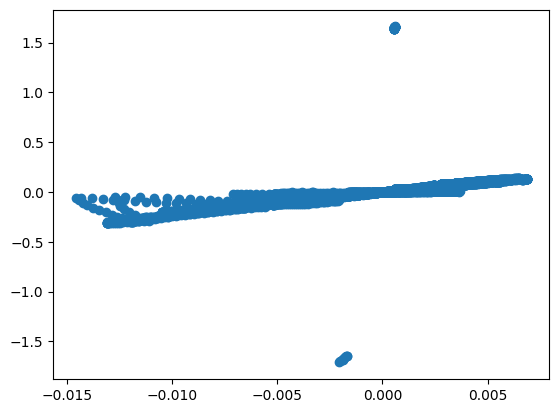

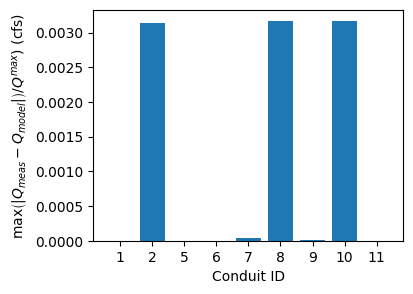

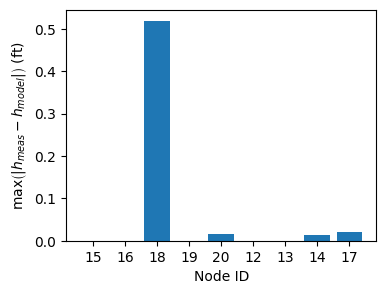

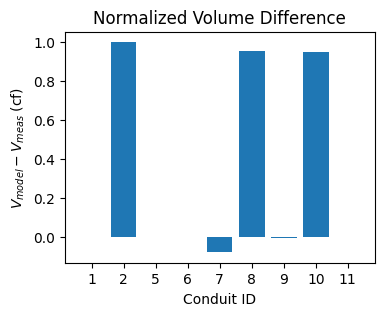

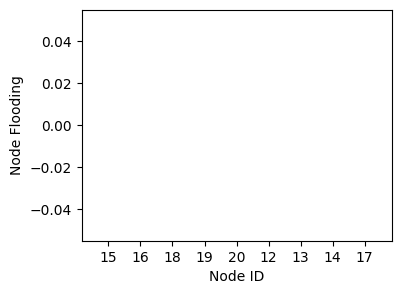

In [192]:
# Plot fault and healthy flow time series.
flow_link_id = 10
fig, ax = plt.subplots(figsize=(5,2))
ax.plot(model_df['datetime'], fault_df[f'Flow_link_{flow_link_id}'], 'k', label='Measured')
ax.plot(model_df['datetime'], model_df[f'Flow_link_{flow_link_id}'], 'r--', label='Model')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()
ax.set_ylabel('Flow (cfs)')

# Plot fault and healthy depth time series.
depth_node_id = 14
fig, ax = plt.subplots(figsize=(5,2))
ax.plot(model_df['datetime'], fault_df[f'Depth_node_{depth_node_id}'], 'k', label='Measured')
ax.plot(model_df['datetime'], model_df[f'Depth_node_{depth_node_id}'], 'r--', label='Model')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()
ax.set_ylabel('Depth (ft)')

# Plot depth residual vs. velocity residual.
v_residual = fault_df[f'Velocity_link_{flow_link_id}'] - model_df[f'Velocity_link_{flow_link_id}']
d_residual = fault_df[f'Depth_link_{flow_link_id}'] - model_df[f'Depth_link_{flow_link_id}']
fig, ax = plt.subplots()
ax.scatter(d_residual, v_residual)

# Plot maximum and minimum flow residual value for each conduit.
conduit_names = model_swmm.get_component_names('CONDUITS')
max_flow_residual = []
for i, cname in enumerate(conduit_names):
    # Get the conduit geometry.
    geom = model_swmm.get_link_geometry(cname)
    
    # Max flow rate ~ 1.393 D^3.
    Qmax = geom[0]**3
    
    # Residuals.
    residual = fault_df[f'Flow_link_{cname}'] - model_df[f'Flow_link_{cname}']
    
    # Normalize by maximum possible (unpressurized) flow.
    norm_abs_residual = np.abs(residual) / Qmax
    
    # Maximum residual value.
    max_residual = np.max(norm_abs_residual)
    max_flow_residual.append(max_residual)
    
fig, ax = plt.subplots(figsize=(4,3))
ax.bar(conduit_names, max_flow_residual) 
ax.set_xlabel('Conduit ID')
ax.set_ylabel('max$\\left(|Q_{meas} - Q_{model}|\\right) / Q^{max})$ (cfs)')

# Plot maximum head residual value for each node.
node_names = model_swmm.get_component_names('JUNCTIONS')
node_names.extend(model_swmm.get_component_names('OUTFALLS'))
max_head_residual = []
for i, node_name in enumerate(node_names):
    max_head_residual.append(np.max(np.abs(fault_df[f'Depth_node_{node_name}'] - model_df[f'Depth_node_{node_name}'])))
    
fig, ax = plt.subplots(figsize=(4,3))
ax.bar(node_names, max_head_residual) 
ax.set_xlabel('Node ID')
ax.set_ylabel('max$\\left(|h_{meas} - h_{model}|\\right)$ (ft)')

# Plot the difference in cumulative volume through each conduit.
volume_diff = []
for i, cname in enumerate(conduit_names):
    volume_diff.append((np.sum(model_df[f'Flow_link_{cname}']) - np.sum(fault_df[f'Flow_link_{cname}'])))
    
fig, ax = plt.subplots(figsize=(4,3))
ax.bar(conduit_names, volume_diff) 
ax.set_xlabel('Conduit ID')
ax.set_ylabel('$V_{model} - V_{meas}$ (cf)')
ax.set_title('Normalized Volume Difference')

# Plot node flooding.
node_flooding = []
for i, node_name in enumerate(node_names):
    node_flooding.append(np.sum(fault_df[f'Flood_node_{node_name}']))
    
fig, ax = plt.subplots(figsize=(4,3))
ax.bar(node_names, node_flooding) 
ax.set_xlabel('Node ID')
ax.set_ylabel('Node Flooding') 